# Análisis exploratorio de la tabla de estudiantes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# test-pr

In [2]:
import sklearn

In [3]:
# Chequeo nuestra version 
sklearn.__version__

'1.0.2'

Un proyecto de data science tiene varias etapas: 

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado 
4. Puesta en Producción


<font size=5>  🚀 Procesamiento de datos 👩🏽‍💻</font>

Una vez que visualizamos y exploramos el dataset tenemos una idea de cómo lucen nuestros datos. Es por eso que ahora debemos empezar a preparar nuestros datos para los siguientes pasos según lo que aprendimos de ellos y las preguntas que nos planteamos.

In [10]:
# Leemos nuevamente los datos de los estudiantes
students = pd.read_csv('StudentsPerformance.csv')

In [12]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,NaN,standard,none,1.125000,72,74
1,female,group C,some college,standard,completed,1.078125,90,88
2,female,group B,master's degree,standard,none,1.406250,95,93
3,male,group A,associate's degree,free/reduced,none,0.734375,57,44
4,male,group C,some college,standard,none,1.187500,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,1.375000,99,95
996,male,group C,high school,free/reduced,none,0.968750,55,55
997,female,group C,high school,free/reduced,completed,0.921875,71,65
998,female,group D,some college,standard,completed,1.062500,78,77


#### MANEJO DE DATOS FALTANTES 🚨

Primero, chequear datos faltantes.

In [14]:
students.isna().sum()

gender                          0
race/ethnicity                 11
parental level of education    10
lunch                           5
test preparation course        15
math score                      0
reading score                   0
writing score                   0
dtype: int64

¿Cuánto representan esos valores faltantes?

In [15]:
students.isna().sum()/students.shape[0]*100

gender                         0.0
race/ethnicity                 1.1
parental level of education    1.0
lunch                          0.5
test preparation course        1.5
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

**¿Qué debo preguntarme al manejar datos faltantes?**

- ¿Quiero conservar la información?
- ¿Qué tipo de datos tengo en la columna que voy a imputar?
- ¿Por qué puede ser que tengo los valores faltantes?:
    - Valores faltantes al azar
    - Valores faltantes no al azar

**¿Cómo decido qué hago con los valores faltantes?**

- Entender que no hay una manera _perfecta_ de manejar los valores faltantes.

- Depende de mis datos

- Observar no solo la cantidad de datos faltantes sino también su patrón.

- Estrategias:  
     - **Eliminar los valores (fila)**:
        - Si la recogida de datos no se ha realizado de forma aleatoria introduce sesgo.  
        - En el caso de que haya mucho patrones con datos faltantes, podría reducir considerablemente la cantidad de filas disponibles. 
     - **Eliminación de la variable (columna)**:
         - Las variables “descartadas” podrían contener información de vital importancia.      
     - **Imputar los valores**:
        - Sustituir por media o mediana: solo en variables numéricas  
        - Sustituir por valor más frecuente: útil para variables categóricas
        - Algoritmo de ML: K-NN (k-nearest neighboors)

A) Si optamos por eliminar los datos, puedemos hacerlo usando la siguiente función:
    
`.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)`

- **axis**: {0, 1}, default 0. 0: Filas, 1: Columnas
- **how**: {'any', 'all'}, default 'any'. Any: Si hay un valor faltante elimina la columna o fila. All: Si todos los valores de la fila o columna son faltantes, elimina la fila o columna.
- **thresh**: (int) requiere de un mínimo de valores no-faltantes.
- **subset**: Nombre de filas o columnas donde buscar valores faltantes
- **inplace**: True modifica el DataFrame original

[documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [16]:
students_drop = students.dropna()

In [17]:
students_drop.shape

(959, 8)

In [18]:
students.dropna(how='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,NaN,standard,none,1.125000,72,74
1,female,group C,some college,standard,completed,1.078125,90,88
2,female,group B,master's degree,standard,none,1.406250,95,93
3,male,group A,associate's degree,free/reduced,none,0.734375,57,44
4,male,group C,some college,standard,none,1.187500,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,1.375000,99,95
996,male,group C,high school,free/reduced,none,0.968750,55,55
997,female,group C,high school,free/reduced,completed,0.921875,71,65
998,female,group D,some college,standard,completed,1.062500,78,77


In [19]:
students.dropna(subset=['race/ethnicity'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,NaN,standard,none,1.125000,72,74
1,female,group C,some college,standard,completed,1.078125,90,88
2,female,group B,master's degree,standard,none,1.406250,95,93
3,male,group A,associate's degree,free/reduced,none,0.734375,57,44
4,male,group C,some college,standard,none,1.187500,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,1.375000,99,95
996,male,group C,high school,free/reduced,none,0.968750,55,55
997,female,group C,high school,free/reduced,completed,0.921875,71,65
998,female,group D,some college,standard,completed,1.062500,78,77


In [20]:
students.dropna(subset=['race/ethnicity', 'parental level of education'], inplace=True)

In [21]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,1.078125,90,88
2,female,group B,master's degree,standard,none,1.406250,95,93
3,male,group A,associate's degree,free/reduced,none,0.734375,57,44
4,male,group C,some college,standard,none,1.187500,78,75
5,female,group B,associate's degree,standard,none,1.109375,83,78
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,1.375000,99,95
996,male,group C,high school,free/reduced,none,0.968750,55,55
997,female,group C,high school,free/reduced,completed,0.921875,71,65
998,female,group D,some college,standard,completed,1.062500,78,77


B) Si optamos por imputar los datos, podemos hacerlo usando la siguiente función:
    
`sklearn.impute.SimpleImputer(missing_values=nan, strategy=’mean’, fill_value=None, copy=True, add_indicator=False)`
    
- **missing_values**: Indica cómo son representados los valores faltantes (np.nan es el estándard)
- **strategy**: `mean`, `median`, `most_frequent`, `constant`.
- **fill_value**: Si uso `constant`, puedo usar `fill_value` para indicar por cuál valor debe ser reemplazado
- **copy**: Si pongo True, crea una copia de X
- **add_indicator**: Agrega un indicador para los valores faltantes.


[documentación](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

In [22]:
from sklearn.impute import SimpleImputer

**Variable: `lunch`**

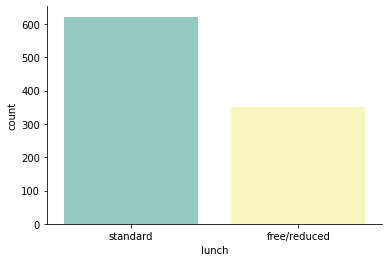

In [23]:
sns.countplot(x='lunch', data=students, palette='Set3')
sns.despine()

In [24]:
students['lunch'].value_counts()

standard        622
free/reduced    352
Name: lunch, dtype: int64

In [25]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [26]:
lunch_imputados = imputer.fit_transform(students[['lunch']])

In [27]:
np.shape(lunch_imputados)

(979, 1)

In [28]:
lunch_imputados[:10]

array([['standard'],
       ['standard'],
       ['free/reduced'],
       ['standard'],
       ['standard'],
       ['standard'],
       ['free/reduced'],
       ['free/reduced'],
       ['free/reduced'],
       ['standard']], dtype=object)

In [29]:
students['lunch'] = lunch_imputados

In [30]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,1.078125,90,88
2,female,group B,master's degree,standard,none,1.406250,95,93
3,male,group A,associate's degree,free/reduced,none,0.734375,57,44
4,male,group C,some college,standard,none,1.187500,78,75
5,female,group B,associate's degree,standard,none,1.109375,83,78


In [31]:
students['lunch'].value_counts()

standard        627
free/reduced    352
Name: lunch, dtype: int64

**Variable: `test preparation course`**

In [32]:
students['test preparation course'].value_counts()

none         621
completed    343
Name: test preparation course, dtype: int64

In [33]:
imputer_cursos = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='none')

In [34]:
students['test preparation course'] = imputer_cursos.fit_transform(students[['test preparation course']])

In [35]:
students['test preparation course'].value_counts()

none         636
completed    343
Name: test preparation course, dtype: int64

In [36]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,1.078125,90,88
2,female,group B,master's degree,standard,none,1.406250,95,93
3,male,group A,associate's degree,free/reduced,none,0.734375,57,44
4,male,group C,some college,standard,none,1.187500,78,75
5,female,group B,associate's degree,standard,none,1.109375,83,78


In [37]:
students.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### DETECCIÓN DE OUTLIERS

¿Qué es un outlier? Es una observación anormal y extrema en una muestra estadística o serie temporal de datos que puede afectar potencialmente a la estimación de los parámetros del mismo.

- Manera de detectar outliers:
    - z-score
        - Considera que todo valor que se aleje mucho de la media es un outlier.
        - Depende de la media y el desvío estandard para medir la centralidad y dispersión, los cuales son muy afectados por outliers. Si las variables no tienen una distribución normal, termino removiendo muchos outliers del dataset.
        - No funciona bien en dataset muy pequeños.
    - Rango Intercuartil: 
        - Es robusto y no es tan sensible a outliers.

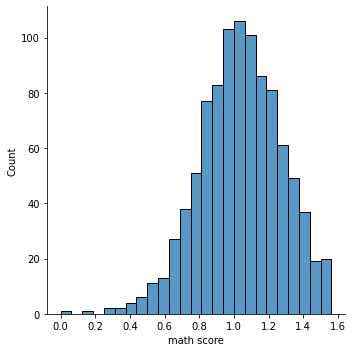

In [38]:
sns.displot(students['math score'])
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


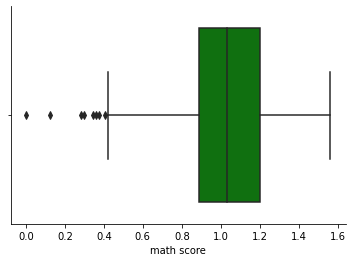

In [39]:
sns.boxplot(students['math score'], color='Green')
sns.despine()

In [41]:
z = stats.zscore(np.array(students['math score']))

# (x-xm)/dvs

In [42]:
threshold = 2.5
#umbral para el outlier

In [43]:
z_index = students['math score'] [np.abs(z) < threshold].index
# abs es para pasar a positivos los negativos
students = students.loc[z_index]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


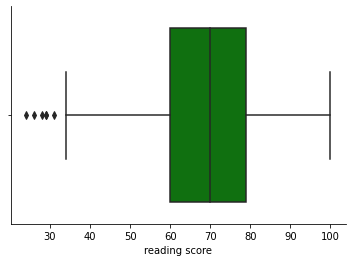

In [44]:
sns.boxplot(students['reading score'], color='Green')
sns.despine()

In [45]:
q1 = students['reading score'].quantile(0.25) # primer cuartil
q3 = students['reading score'].quantile(0.75) # tercer cuartil

In [46]:
iqr = q3 - q1 #rango interquartil
lb = q1 - (iqr * 1.5) #limite inferior
ub = q3 + (iqr * 1.5) #limite superior

In [47]:
students = students[(students['reading score'] > lb) & (students['reading score'] < ub)]

In [48]:
students.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


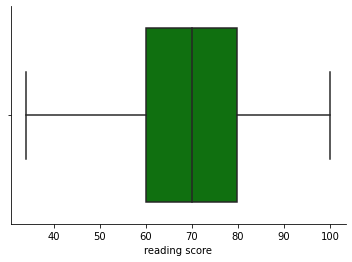

In [49]:
sns.boxplot(students['reading score'], color='Green')
sns.despine()

#### GENERACIÓN DE NUEVAS VARIABLES

- La manera de combinar variables ya presentes que puedan capturar efectos dependientes entre ambos y afectar el resultado es:
    * Sumando o restando variables
    * Multiplicando o dividiendo variables

In [50]:
students['english score'] = (students['writing score']+students['reading score'])/2

#### TRANSFORMACIÓN DE VARIABLES

- La mayoría de los algoritmos de machine learning no admiten `strings` como variables y requieren que las variables sean numéricas. Por ese motivo, es necesario convertir las variables categoricas en su representación numérica. 

**`apply`**

In [ ]:
students['test preparation course'] = students['test preparation course'].apply(lambda x:0 if x== 'none' else 1 )

In [ ]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,english score
0,female,group C,some college,standard,1,1.078125,90,88,89.0
1,female,group B,master's degree,standard,0,1.406250,95,93,94.0
2,male,group A,associate's degree,free/reduced,0,0.734375,57,44,50.5
3,male,group C,some college,standard,0,1.187500,78,75,76.5
4,female,group B,associate's degree,standard,0,1.109375,83,78,80.5


**`get_dummies()`**

In [51]:
students[['female', 'male']] = pd.get_dummies(students['gender'])

In [52]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,english score,female,male
0,female,group C,some college,standard,completed,1.078125,90,88,89.0,1,0
1,female,group B,master's degree,standard,none,1.406250,95,93,94.0,1,0
2,male,group A,associate's degree,free/reduced,none,0.734375,57,44,50.5,0,1
3,male,group C,some college,standard,none,1.187500,78,75,76.5,0,1
4,female,group B,associate's degree,standard,none,1.109375,83,78,80.5,1,0


**`LabelEncoder()`**

In [55]:
from sklearn.preprocessing import LabelEncoder

In [60]:
test_encoder = LabelEncoder()

In [61]:
students.loc[:, 'race/ethnicity'] = test_encoder.fit_transform(students['race/ethnicity'])

In [62]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,english score,female,male
0,female,2,some college,standard,completed,1.078125,90,88,89.0,1,0
1,female,1,master's degree,standard,none,1.406250,95,93,94.0,1,0
2,male,0,associate's degree,free/reduced,none,0.734375,57,44,50.5,0,1
3,male,2,some college,standard,none,1.187500,78,75,76.5,0,1
4,female,1,associate's degree,standard,none,1.109375,83,78,80.5,1,0


**`OneHotEncoder()`**

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
parental_encoder = OneHotEncoder()

In [65]:
parental_encoder.fit_transform(students[['parental level of education']]).toarray()

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [66]:
parental_encoder.categories_

[array(["associate's degree", "bachelor's degree", 'high school',
        "master's degree", 'some college', 'some high school'],
       dtype=object)]

In [67]:
niveles = parental_encoder.categories_[0].tolist()

In [68]:
one_hot_students = pd.DataFrame(parental_encoder.fit_transform(students[['parental level of education']]).toarray(), columns=niveles)

In [69]:
students = pd.concat([students, one_hot_students], axis=1)

In [70]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,english score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,female,2,some college,standard,completed,1.078125,90,88,89.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0
1,female,1,master's degree,standard,none,1.406250,95,93,94.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0
2,male,0,associate's degree,free/reduced,none,0.734375,57,44,50.5,0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,male,2,some college,standard,none,1.187500,78,75,76.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,female,1,associate's degree,standard,none,1.109375,83,78,80.5,1,0,1.0,0.0,0.0,0.0,0.0,0.0


**`LabelBinarizer`**

In [71]:
from sklearn.preprocessing import LabelBinarizer

In [72]:
lb_lunch = LabelBinarizer()

In [73]:
students['lunch'] = lb_lunch.fit_transform(students['lunch'])

In [74]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,english score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,female,2,some college,1,completed,1.078125,90,88,89.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0
1,female,1,master's degree,1,none,1.406250,95,93,94.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0
2,male,0,associate's degree,0,none,0.734375,57,44,50.5,0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,male,2,some college,1,none,1.187500,78,75,76.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,female,1,associate's degree,1,none,1.109375,83,78,80.5,1,0,1.0,0.0,0.0,0.0,0.0,0.0


In [75]:
students.drop(['gender', 'parental level of education'], axis=1, inplace=True)

In [76]:
students.head()

,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,english score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,2,1,completed,1.078125,90,88,89.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,none,1.406250,95,93,94.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,none,0.734375,57,44,50.5,0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,2,1,none,1.187500,78,75,76.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,none,1.109375,83,78,80.5,1,0,1.0,0.0,0.0,0.0,0.0,0.0


**`binning`**

In [77]:
bins_score = [0, 60, 70, 80, 90, 100]
score_categorias = pd.cut(students['reading score'], bins=bins_score, 
                          labels=['desaprobado', 'regular', 'bien', 'muy bien', 'sobresaliente'])

In [78]:
score_categorias

0           muy bien
1      sobresaliente
2        desaprobado
3               bien
4           muy bien
           ...      
957    sobresaliente
958      desaprobado
959             bien
960             bien
961         muy bien
Name: reading score, Length: 962, dtype: category
Categories (5, object): ['desaprobado' < 'regular' < 'bien' < 'muy bien' < 'sobresaliente']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


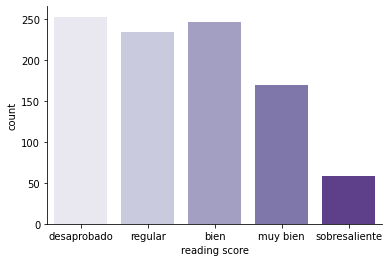

In [79]:
sns.countplot(score_categorias, palette='Purples')
sns.despine()

**`KBinsDiscretizer`**

[documentacion](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html)

In [80]:
from sklearn.preprocessing import KBinsDiscretizer

In [82]:
kbins = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile')

In [85]:
bins = kbins.fit_transform(students[['reading score']]).flatten()

In [86]:
bins

array([5., 5., 1., 4., 4., 5., 0., 2., 1., 0., 0., 4., 3., 0., 3., 5., 0.,
       1., 2., 3., 0., 3., 3., 3., 0., 2., 3., 3., 3., 2., 3., 0., 5., 4.,
       4., 2., 5., 1., 1., 3., 1., 2., 1., 0., 2., 3., 3., 5., 2., 0., 4.,
       5., 0., 5., 0., 1., 3., 0., 1., 4., 1., 2., 0., 3., 1., 2., 1., 0.,
       0., 1., 0., 0., 4., 3., 2., 0., 0., 0., 2., 0., 4., 4., 3., 3., 5.,
       3., 4., 0., 5., 4., 2., 3., 2., 2., 2., 3., 5., 0., 2., 5., 1., 4.,
       2., 5., 0., 0., 1., 5., 4., 5., 4., 1., 2., 5., 5., 5., 1., 4., 5.,
       2., 4., 4., 0., 5., 0., 3., 4., 4., 0., 0., 0., 2., 1., 3., 1., 0.,
       0., 3., 5., 2., 3., 5., 2., 2., 3., 0., 2., 5., 3., 1., 5., 1., 4.,
       5., 0., 0., 5., 0., 4., 4., 3., 3., 5., 5., 2., 0., 5., 0., 4., 3.,
       5., 2., 2., 0., 2., 0., 2., 4., 2., 0., 5., 2., 4., 1., 5., 0., 2.,
       1., 0., 4., 5., 4., 4., 2., 0., 3., 1., 4., 4., 1., 4., 1., 0., 5.,
       4., 5., 0., 4., 1., 2., 5., 2., 4., 2., 1., 3., 0., 3., 5., 2., 0.,
       5., 5., 4., 3., 2.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


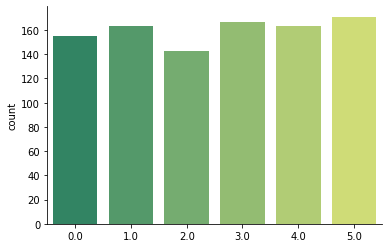

In [87]:
sns.countplot(bins, palette='summer')
sns.despine()

#### ESTANDARIZACIÓN DE DATOS

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaler = MinMaxScaler(feature_range=(0, 100))

In [90]:
students['math score'] = scaler.fit_transform(students[['math score']])

In [91]:
students.head()

,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,english score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,2,1,completed,56.338028,90,88,89.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,none,85.915493,95,93,94.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,none,25.352113,57,44,50.5,0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,2,1,none,66.197183,78,75,76.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,none,59.154930,83,78,80.5,1,0,1.0,0.0,0.0,0.0,0.0,0.0


In [92]:
students['math score'].describe()

count    962.000000
mean      53.147785
std       20.001309
min        0.000000
25%       39.436620
50%       52.112676
75%       67.605634
max      100.000000
Name: math score, dtype: float64

#### 💾 &nbsp; GUARDANDO EL ARCHIVO PARA LOS SIGUIENTES PASOS

In [93]:
students.to_csv()

",race/ethnicity,lunch,test preparation course,math score,reading score,writing score,english score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school\n0,2,1,completed,56.33802816901407,90,88,89.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0\n1,1,1,none,85.91549295774647,95,93,94.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0\n2,0,0,none,25.352112676056343,57,44,50.5,0,1,1.0,0.0,0.0,0.0,0.0,0.0\n3,2,1,none,66.19718309859155,78,75,76.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0\n4,1,1,none,59.15492957746479,83,78,80.5,1,0,1.0,0.0,0.0,0.0,0.0,0.0\n5,1,1,completed,83.09859154929578,95,92,93.5,1,0,0.0,0.0,0.0,0.0,1.0,0.0\n6,1,0,none,15.492957746478872,43,39,41.0,0,1,0.0,0.0,0.0,0.0,1.0,0.0\n7,3,0,completed,49.29577464788732,64,67,65.5,0,1,0.0,0.0,1.0,0.0,0.0,0.0\n8,1,0,none,12.676056338028168,60,50,55.0,1,0,0.0,0.0,1.0,0.0,0.0,0.0\n9,2,1,none,40.84507042253521,54,52,53.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0\n10,3,1,none,15.492957746478872,52,43,47.5,0,1,1.0,0.0,0.0,0.0,0.0,0.0\n11,1,1,none,5

In [94]:
from IPython.display import FileLink

students.to_csv('estudiantes.csv', index=False)
#p_df.to_excel('/path/to/data.xlsx', index=False)

FileLink('estudiantes.csv')

/content/estudiantes.csv